In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [2]:
df=pd.read_csv("/home/sathish/Downloads/day (1).csv")

In [3]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
df.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,31-12-2019,1,1,12,0,1,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


In [5]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
columns_to_impute=['instant','dteday','season','yr','mnth','holiday','weekday','workingday','weathersit','temp','atemp','hum','windspeed','casual','registered','cnt']
for i in columns_to_impute:
    print("how many unique value for ",i," : ",df[i].nunique())

how many unique value for  instant  :  730
how many unique value for  dteday  :  730
how many unique value for  season  :  4
how many unique value for  yr  :  2
how many unique value for  mnth  :  12
how many unique value for  holiday  :  2
how many unique value for  weekday  :  7
how many unique value for  workingday  :  2
how many unique value for  weathersit  :  3
how many unique value for  temp  :  498
how many unique value for  atemp  :  689
how many unique value for  hum  :  594
how many unique value for  windspeed  :  649
how many unique value for  casual  :  605
how many unique value for  registered  :  678
how many unique value for  cnt  :  695


In [7]:
varlist=['season']

def binary_map(x):
    return x.map({1:"Spring",2:"Summer",3:"Fall",4:"Winter"})
df[varlist]=df[varlist].apply(binary_map)

In [8]:
varlist=['weathersit']

def binary_map(x):
    return x.map({1:"Clear",2:"Misty",3:"Light Snow or Rain",4:"Heavy Snow or Rain"})
df[varlist]=df[varlist].apply(binary_map)

In [9]:
varlist=['season']

def binary_map(x):
    return x.map({"Spring":0,"Summer":1,"Fall":2,"Winter":3})
df[varlist]=df[varlist].apply(binary_map)

In [10]:
varlist=['weathersit']

def binary_map(x):
    return x.map({"Clear":0,"Misty":1,"Light Snow or Rain":2,"Heavy Snow or Rain":3})
df[varlist]=df[varlist].apply(binary_map)

In [11]:
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,0,0,1,0,6,0,1,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,0,0,1,0,0,0,1,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,0,0,1,0,1,1,0,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,0,0,1,0,2,1,0,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,0,0,1,0,3,1,0,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,0,1,12,0,4,1,1,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,0,1,12,0,5,1,1,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,0,1,12,0,6,0,1,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,0,1,12,0,0,0,0,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [12]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,1.498630,0.500000,6.526027,0.028767,2.997260,0.683562,0.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,1.000000,0.000000,4.000000,0.000000,1.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,2.000000,0.500000,7.000000,0.000000,3.000000,1.000000,0.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,2.000000,1.000000,10.000000,0.000000,5.000000,1.000000,1.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,3.000000,1.000000,12.000000,1.000000,6.000000,1.000000,2.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [13]:
columns_to_drop = ["instant","dteday","casual"]
df=df.drop(columns=[col for col in columns_to_drop if col in df.columns])

In [14]:
df

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,registered,cnt
0,0,0,1,0,6,0,1,14.110847,18.18125,80.5833,10.749882,654,985
1,0,0,1,0,0,0,1,14.902598,17.68695,69.6087,16.652113,670,801
2,0,0,1,0,1,1,0,8.050924,9.47025,43.7273,16.636703,1229,1349
3,0,0,1,0,2,1,0,8.200000,10.60610,59.0435,10.739832,1454,1562
4,0,0,1,0,3,1,0,9.305237,11.46350,43.6957,12.522300,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,0,1,12,0,4,1,1,10.420847,11.33210,65.2917,23.458911,1867,2114
726,0,1,12,0,5,1,1,10.386653,12.75230,59.0000,10.416557,2451,3095
727,0,1,12,0,6,0,1,10.386653,12.12000,75.2917,8.333661,1182,1341
728,0,1,12,0,0,0,0,10.489153,11.58500,48.3333,23.500518,1432,1796


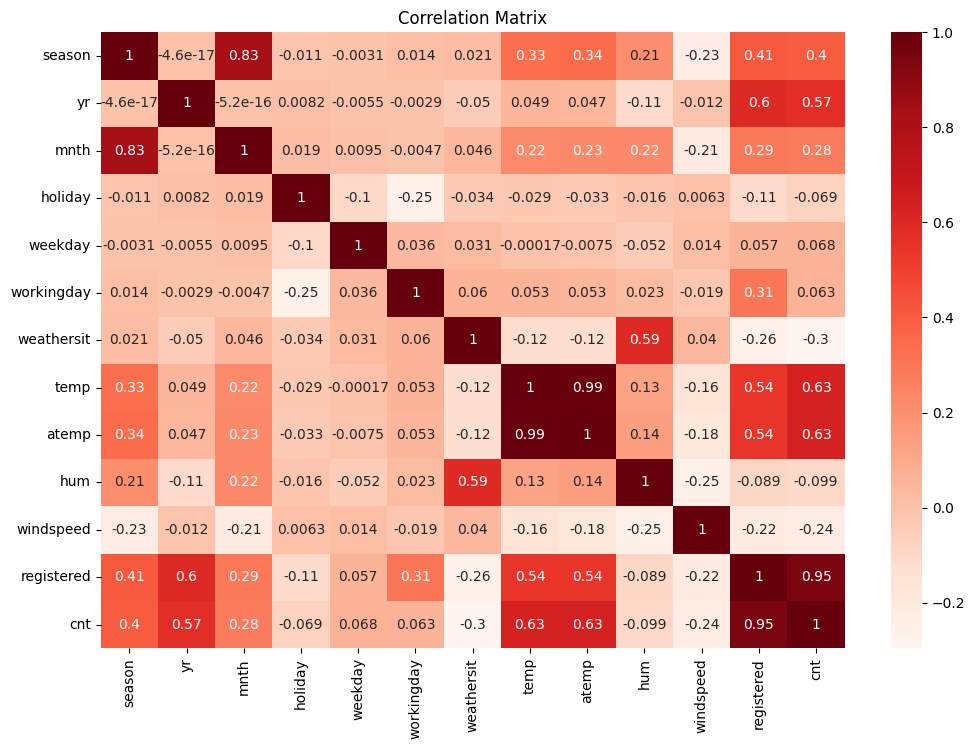

In [15]:
correlation_matrix=df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix,annot=True, cmap='Reds')
plt.title("Correlation Matrix")
plt.show()

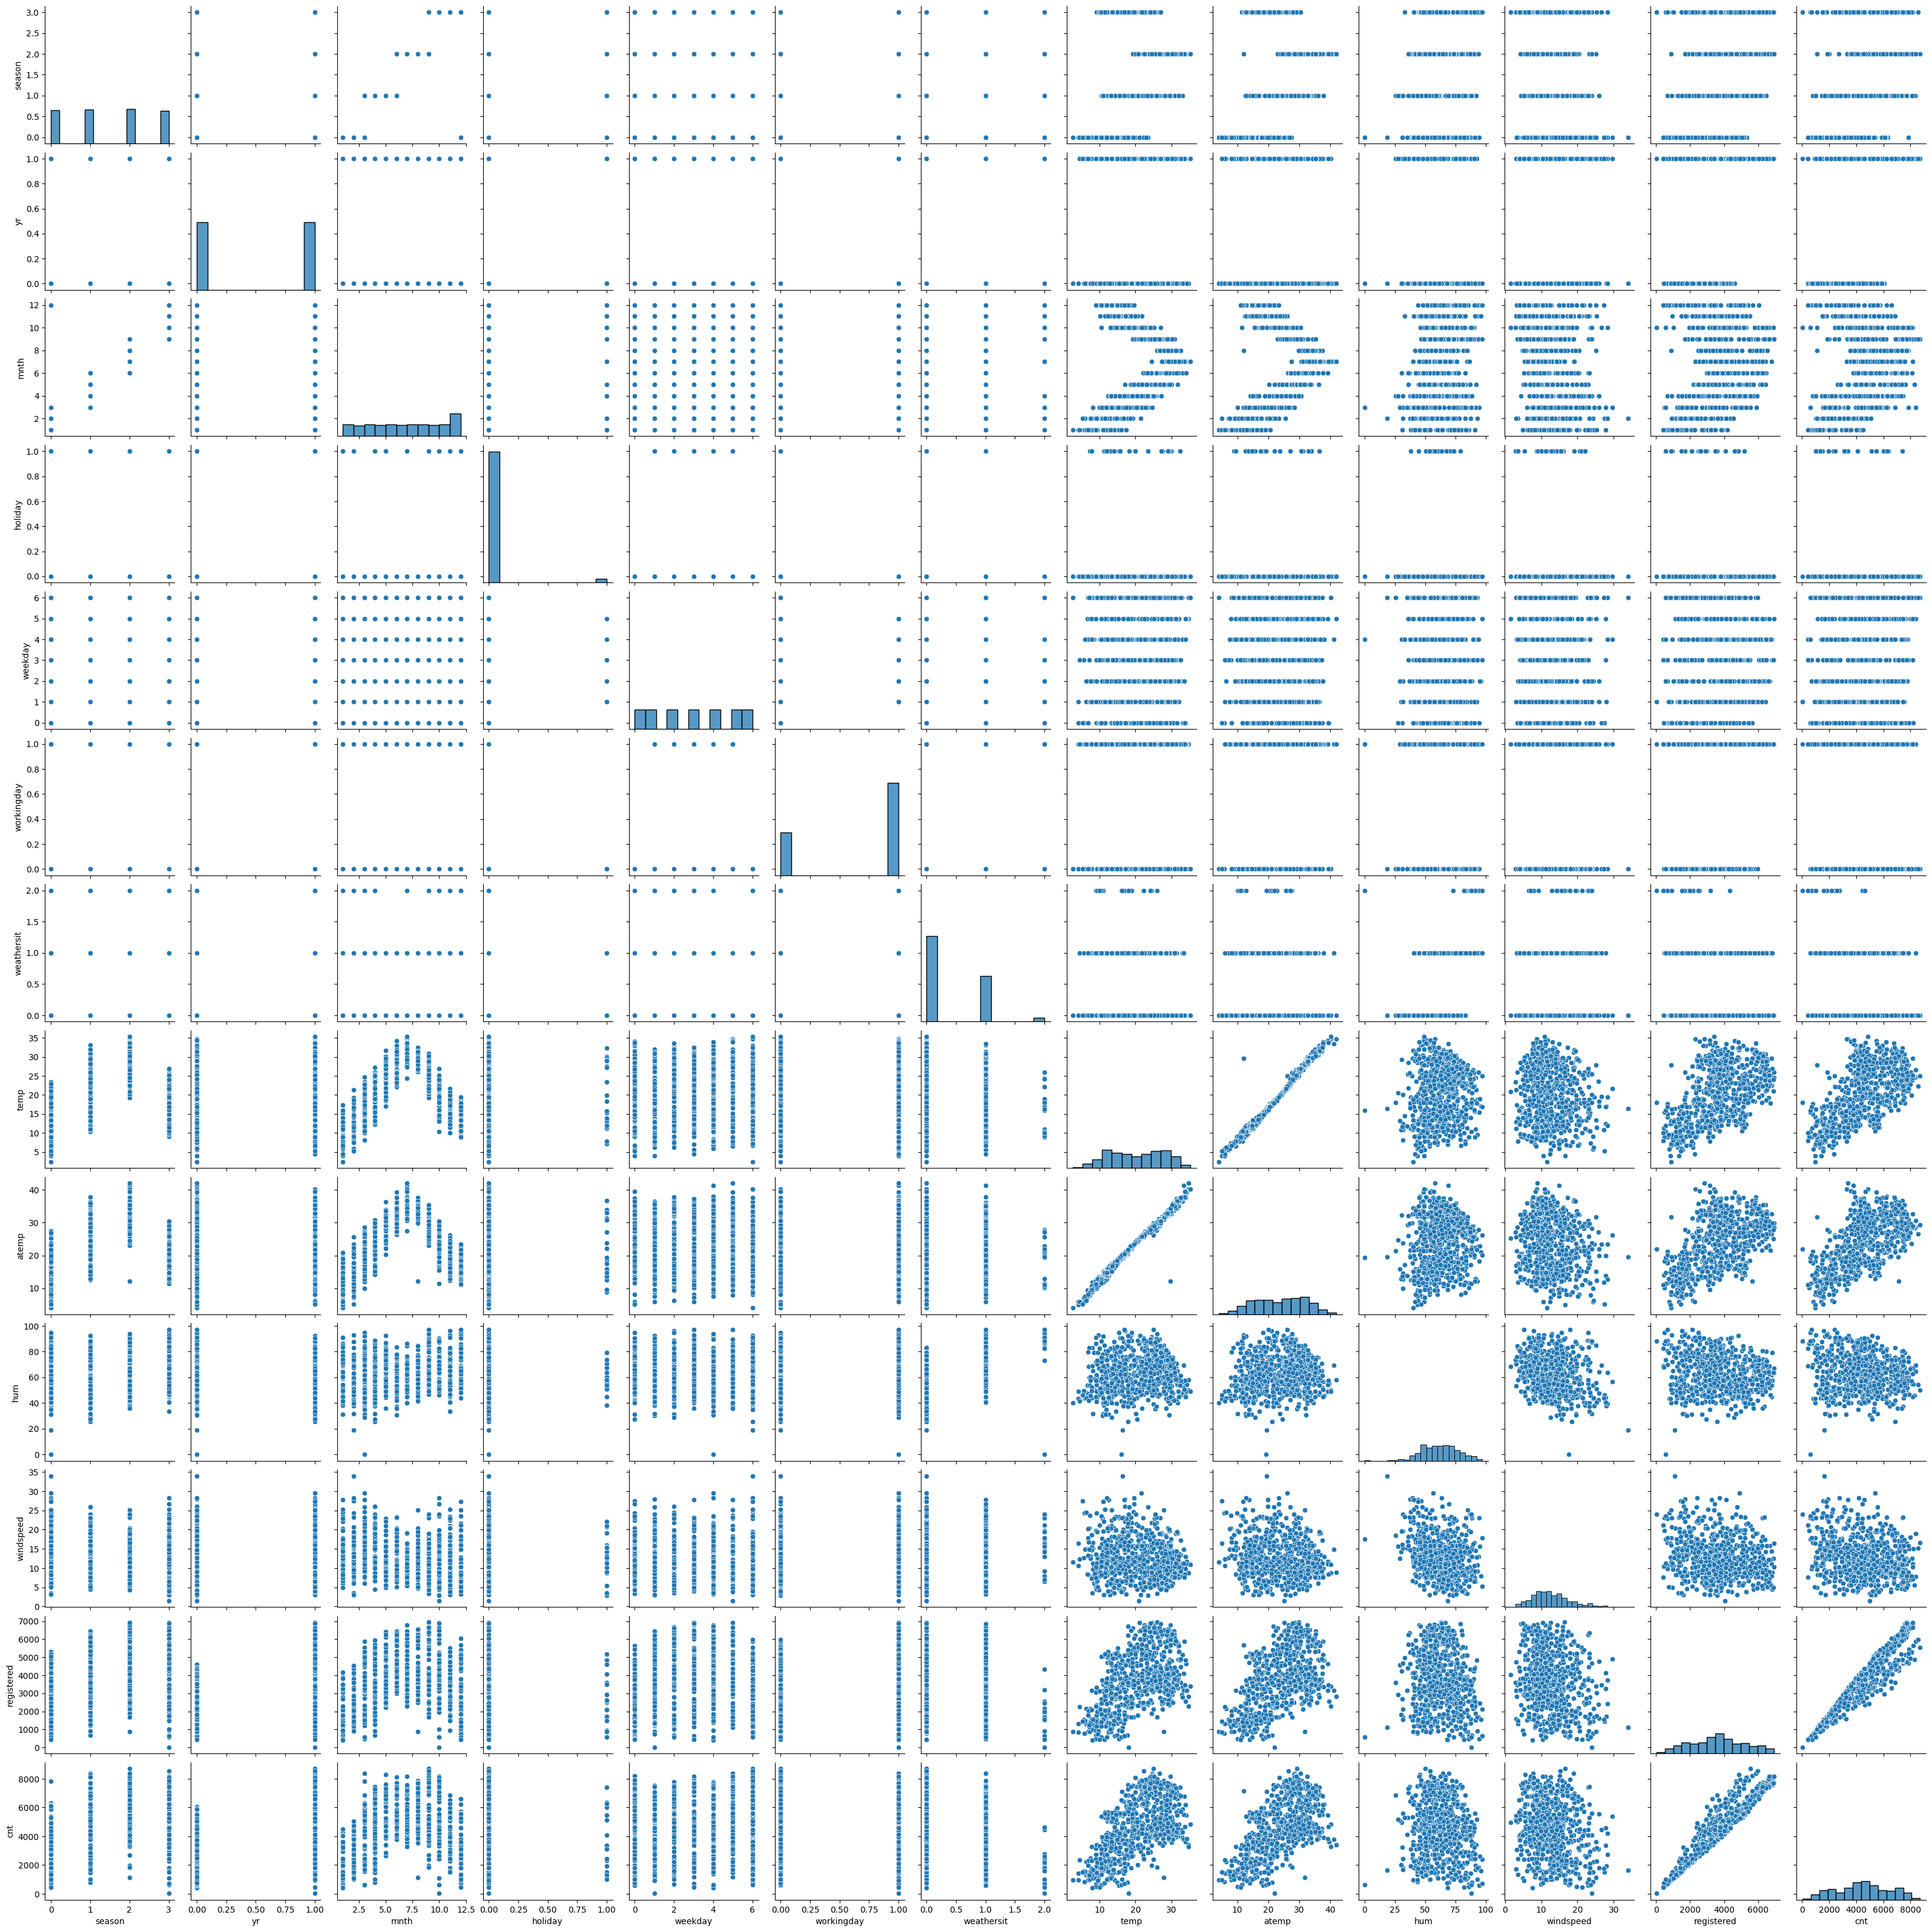

In [16]:
sns.pairplot(df)

In [17]:
from sklearn.model_selection import train_test_split
df_train,df_test=train_test_split(df,train_size=0.7,test_size=0.3,random_state=42)

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [19]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [20]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [21]:
from sklearn.model_selection import train_test_split
df_train,df_test=train_test_split(df,train_size=0.7,test_size=0.3,random_state=42)

In [22]:
y_train=df_train.pop('cnt')
x_train=df_train

In [23]:
import statsmodels.api as sm
x_train=sm.add_constant(df_train)
lm=sm.OLS(y_train,x_train).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     1126.
Date:                Tue, 06 Aug 2024   Prob (F-statistic):               0.00
Time:                        21:40:36   Log-Likelihood:                -3732.0
No. Observations:                 510   AIC:                             7490.
Df Residuals:                     497   BIC:                             7545.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        378.0463    141.101      2.679      0.0

In [24]:
vif=pd.DataFrame()
vif['features']=x_train.columns
vif['VIF']=[variance_inflation_factor(x_train.values,i)for i in range(x_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,features,VIF
9,atemp,170.35
8,temp,166.01
0,const,74.46
12,registered,5.44
1,season,4.22
3,mnth,3.40
2,yr,2.63
10,hum,1.86
7,weathersit,1.84
6,workingday,1.53


In [25]:
columns_to_drop = ["atemp"]
x_train = x_train.drop(columns=[col for col in columns_to_drop if col in x_train.columns])
lm=sm.OLS(y_train,x_train).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     1216.
Date:                Tue, 06 Aug 2024   Prob (F-statistic):               0.00
Time:                        21:44:09   Log-Likelihood:                -3735.1
No. Observations:                 510   AIC:                             7494.
Df Residuals:                     498   BIC:                             7545.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        506.0372    131.894      3.837      0.0

In [26]:
vif=pd.DataFrame()
vif['features']=x_train.columns
vif['VIF']=[variance_inflation_factor(x_train.values,i)for i in range(x_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,features,VIF
0,const,64.40
11,registered,5.40
1,season,4.22
3,mnth,3.40
2,yr,2.63
8,temp,1.98
7,weathersit,1.83
9,hum,1.83
6,workingday,1.53
10,windspeed,1.22


In [27]:
columns_to_drop = ["const"]
x_train = x_train.drop(columns=[col for col in columns_to_drop if col in x_train.columns])
lm=sm.OLS(y_train,x_train).fit()
print(lm.summary())

                                 OLS Regression Results                                
Dep. Variable:                    cnt   R-squared (uncentered):                   0.994
Model:                            OLS   Adj. R-squared (uncentered):              0.994
Method:                 Least Squares   F-statistic:                              7986.
Date:                Tue, 06 Aug 2024   Prob (F-statistic):                        0.00
Time:                        21:44:22   Log-Likelihood:                         -3742.5
No. Observations:                 510   AIC:                                      7507.
Df Residuals:                     499   BIC:                                      7554.
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [28]:
vif=pd.DataFrame()
vif['features']=x_train.columns
vif['VIF']=[variance_inflation_factor(x_train.values,i)for i in range(x_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,features,VIF
10,registered,34.63
8,hum,17.77
7,temp,16.79
2,mnth,15.51
0,season,12.03
1,yr,5.49
9,windspeed,5.37
5,workingday,4.57
4,weekday,3.07
6,weathersit,2.49


In [30]:

columns_to_drop = ["registered"]
x_train = x_train.drop(columns=[col for col in columns_to_drop if col in x_train.columns])
lm=sm.OLS(y_train,x_train).fit()
print(lm.summary())

                                 OLS Regression Results                                
Dep. Variable:                    cnt   R-squared (uncentered):                   0.967
Model:                            OLS   Adj. R-squared (uncentered):              0.967
Method:                 Least Squares   F-statistic:                              1477.
Date:                Tue, 06 Aug 2024   Prob (F-statistic):                        0.00
Time:                        21:45:22   Log-Likelihood:                         -4190.6
No. Observations:                 510   AIC:                                      8401.
Df Residuals:                     500   BIC:                                      8443.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [31]:
vif=pd.DataFrame()
vif['features']=x_train.columns
vif['VIF']=[variance_inflation_factor(x_train.values,i)for i in range(x_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,features,VIF
8,hum,17.74
2,mnth,15.41
0,season,10.28
7,temp,9.87
9,windspeed,5.32
5,workingday,3.12
4,weekday,3.02
6,weathersit,2.17
1,yr,2.04
3,holiday,1.10


In [32]:

columns_to_drop = ["hum"]
x_train = x_train.drop(columns=[col for col in columns_to_drop if col in x_train.columns])
lm=sm.OLS(y_train,x_train).fit()
print(lm.summary())

                                 OLS Regression Results                                
Dep. Variable:                    cnt   R-squared (uncentered):                   0.967
Model:                            OLS   Adj. R-squared (uncentered):              0.967
Method:                 Least Squares   F-statistic:                              1640.
Date:                Tue, 06 Aug 2024   Prob (F-statistic):                        0.00
Time:                        21:45:49   Log-Likelihood:                         -4191.3
No. Observations:                 510   AIC:                                      8401.
Df Residuals:                     501   BIC:                                      8439.
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [33]:
vif=pd.DataFrame()
vif['features']=x_train.columns
vif['VIF']=[variance_inflation_factor(x_train.values,i)for i in range(x_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,features,VIF
2,mnth,13.88
0,season,10.09
7,temp,7.21
8,windspeed,4.81
5,workingday,3.01
4,weekday,2.94
1,yr,2.03
6,weathersit,1.56
3,holiday,1.08


In [34]:

columns_to_drop = ["mnth"]
x_train = x_train.drop(columns=[col for col in columns_to_drop if col in x_train.columns])
lm=sm.OLS(y_train,x_train).fit()
print(lm.summary())

                                 OLS Regression Results                                
Dep. Variable:                    cnt   R-squared (uncentered):                   0.967
Model:                            OLS   Adj. R-squared (uncentered):              0.966
Method:                 Least Squares   F-statistic:                              1839.
Date:                Tue, 06 Aug 2024   Prob (F-statistic):                        0.00
Time:                        21:45:56   Log-Likelihood:                         -4192.6
No. Observations:                 510   AIC:                                      8401.
Df Residuals:                     502   BIC:                                      8435.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [35]:
vif=pd.DataFrame()
vif['features']=x_train.columns
vif['VIF']=[variance_inflation_factor(x_train.values,i)for i in range(x_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,features,VIF
6,temp,7.13
7,windspeed,4.60
0,season,3.29
4,workingday,3.00
3,weekday,2.91
1,yr,2.02
5,weathersit,1.54
2,holiday,1.07


In [36]:

columns_to_drop = ["temp"]
x_train = x_train.drop(columns=[col for col in columns_to_drop if col in x_train.columns])
lm=sm.OLS(y_train,x_train).fit()
print(lm.summary())

                                 OLS Regression Results                                
Dep. Variable:                    cnt   R-squared (uncentered):                   0.916
Model:                            OLS   Adj. R-squared (uncentered):              0.915
Method:                 Least Squares   F-statistic:                              786.1
Date:                Tue, 06 Aug 2024   Prob (F-statistic):                   3.37e-266
Time:                        21:46:16   Log-Likelihood:                         -4430.1
No. Observations:                 510   AIC:                                      8874.
Df Residuals:                     503   BIC:                                      8904.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [37]:
vif=pd.DataFrame()
vif['features']=x_train.columns
vif['VIF']=[variance_inflation_factor(x_train.values,i)for i in range(x_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,features,VIF
6,windspeed,3.88
3,weekday,2.81
4,workingday,2.72
0,season,2.46
1,yr,1.97
5,weathersit,1.54
2,holiday,1.06


In [38]:

columns_to_drop = ["holiday"]
x_train = x_train.drop(columns=[col for col in columns_to_drop if col in x_train.columns])
lm=sm.OLS(y_train,x_train).fit()
print(lm.summary())

                                 OLS Regression Results                                
Dep. Variable:                    cnt   R-squared (uncentered):                   0.916
Model:                            OLS   Adj. R-squared (uncentered):              0.915
Method:                 Least Squares   F-statistic:                              918.8
Date:                Tue, 06 Aug 2024   Prob (F-statistic):                   1.11e-267
Time:                        21:46:47   Log-Likelihood:                         -4430.1
No. Observations:                 510   AIC:                                      8872.
Df Residuals:                     504   BIC:                                      8898.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [39]:
vif=pd.DataFrame()
vif['features']=x_train.columns
vif['VIF']=[variance_inflation_factor(x_train.values,i)for i in range(x_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,features,VIF
5,windspeed,3.81
2,weekday,2.80
3,workingday,2.64
0,season,2.45
1,yr,1.96
4,weathersit,1.54


In [40]:
x_train

,season,yr,weekday,workingday,weathersit,windspeed
683,3,1,4,1,1,10.250129
645,3,1,1,0,1,12.708493
163,1,0,1,1,0,20.458450
360,0,0,2,1,1,12.626150
640,3,1,3,1,1,4.458569
...,...,...,...,...,...,...
700,3,1,0,0,1,8.333393
71,0,0,0,0,0,18.130468
106,1,0,0,0,0,20.334232
270,3,0,3,1,1,9.958143


In [41]:
y_train

683    5445
645    5478
163    5020
360    1162
640    7572
       ... 
700    4649
71     2417
106    3744
270    3907
435    5298
Name: cnt, Length: 510, dtype: int64

In [42]:
import statsmodels.api as sm
x_train_rfe=sm.add_constant(x_train)
x_train_rfe

,const,season,yr,weekday,workingday,weathersit,windspeed
683,1.0,3,1,4,1,1,10.250129
645,1.0,3,1,1,0,1,12.708493
163,1.0,1,0,1,1,0,20.458450
360,1.0,0,0,2,1,1,12.626150
640,1.0,3,1,3,1,1,4.458569
...,...,...,...,...,...,...,...
700,1.0,3,1,0,0,1,8.333393
71,1.0,0,0,0,0,0,18.130468
106,1.0,1,0,0,0,0,20.334232
270,1.0,3,0,3,1,1,9.958143


In [43]:
lm1=sm.OLS(y_train,x_train_rfe).fit()

In [44]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.579
Model:                            OLS   Adj. R-squared:                  0.574
Method:                 Least Squares   F-statistic:                     115.4
Date:                Tue, 06 Aug 2024   Prob (F-statistic):           3.09e-91
Time:                        21:47:14   Log-Likelihood:                -4362.7
No. Observations:                 510   AIC:                             8739.
Df Residuals:                     503   BIC:                             8769.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2839.5369    230.080     12.342      0.0

In [45]:
y_train_pred=lm1.predict(x_train_rfe)

In [46]:
np.sqrt(mean_squared_error(y_train,y_train_pred))

1255.575215383809

In [47]:
r_squared=r2_score(y_train,y_train_pred)
r_squared

0.5791931595596512